In [3]:
# importing neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:

# data = pd.read_csv("/content/Diwali_Sales_Data.csv")

# # Got an error for unicode

In [5]:
# To avoid encoding errors we can use the unicode_escape

df = pd.read_csv("/content/Diwali_Sales_Data.csv" , encoding='unicode_escape')

# **Data Preprocessing**

In [6]:
# Lets see the Shape of the data

df.shape

# we have 15 columns , 11251 data rows

(11251, 15)

In [7]:
# let see top 5 rows

# df.head()

df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [8]:
# lets see the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# we can clearly see the last two rows are completely null
# Lets drop status , unnamed1 columns

df.drop(['Status' , 'unnamed1' ] , axis = 1 , inplace = True)

In [10]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
# now Lets check how much data has been missed in each column

df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [13]:
# only 12 rows have missing amount
# Lets drop this rows alone
# we are directly changing in the data set using inplace = True

df.dropna(inplace=True)

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [16]:
# Here we can see Amount column is in Float type
# since it is a retailer shop there is no need to consider of floating points do lets convert it into int type

df['Amount'] = df['Amount'].astype('int')

In [17]:
# df.info()

type(df['Amount'][0])


numpy.int64

In [18]:
# Now Lets see what are column we have

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
# Lets rename column names for our Convinience
# make sure all name should be in same formate

df.rename(columns= {

    'Age Group':'Age_Group',
    'Cust_name':'Cust_Name',
    'User_ID':'Cust_ID',

    } , inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_ID           11239 non-null  int64 
 1   Cust_Name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age_Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.5+ MB


# **Exploratory Data Analysis**

In [21]:
# Lets see the description of orders and amount sales

df[['Orders' , 'Amount' ]].describe()

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


In [22]:
df.columns

Index(['Cust_ID', 'Cust_Name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [23]:
# Lets add the theme to look good

# sns.set_theme()
plt.style.use('default')

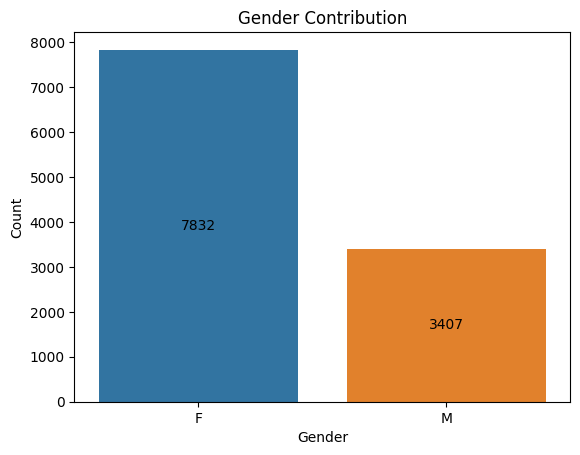

In [24]:
# lets find the insights form data

# 1_ lets see the Gender Contribution
'''
sns.countplot(data = df , x='Gender', hue = 'Gender')
plt.title('Gender Contribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()
'''

# addning with count labels as well

gender_count = sns.countplot(data = df , x='Gender', hue = 'Gender')

for container in gender_count.containers:
    gender_count.bar_label(container , label_type='center')


plt.title('Gender Contribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

The data clearly indicates that the majority of customers are female, with a total of 7,832, compared to 3,407 male customers.

In [25]:


df['Gender'].value_counts()

,count
Gender,
F,7832
M,3407


In [26]:
# Lets check the Average age of the Customers

df.groupby('Gender')['Age'].mean()


,Age
Gender,
F,35.324311
M,35.608160


In [27]:
df.groupby('Gender').agg(
    Avg_Age=('Age', 'mean'),
    Gender_Count=('Gender', 'count')
)


,Avg_Age,Gender_Count
Gender,,
F,35.324311,7832
M,35.608160,3407


In [28]:

# 2_ lets see which Gender customers are generating more revenue

df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


,Gender,Amount
0,F,74335853
1,M,31913276


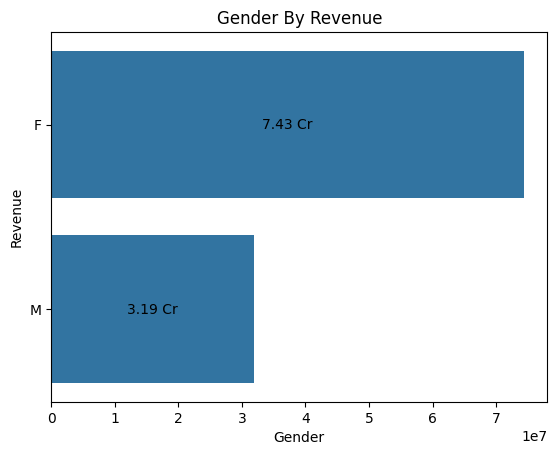

In [29]:
# lets create a plot for this Gender vs revenue

Gender_Revenue = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(data = Gender_Revenue , y = 'Gender' , x = 'Amount')

# adding revenue labels
for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]  # Convert to crores format
    ax.bar_label(container , labels = labels ,label_type='center')

plt.title('Gender By Revenue')
plt.xlabel('Gender')
plt.ylabel('Revenue')

plt.show()



The analysis shows that Females contribute ₹7.43 Cr in revenue, more than double that of Males at ₹3.19 Cr.

In [30]:
# lets see which profession customers are more likely to purchase

df.groupby(['Occupation'] , as_index = False )['Amount'].sum().sort_values(by = 'Amount' , ascending=False)

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


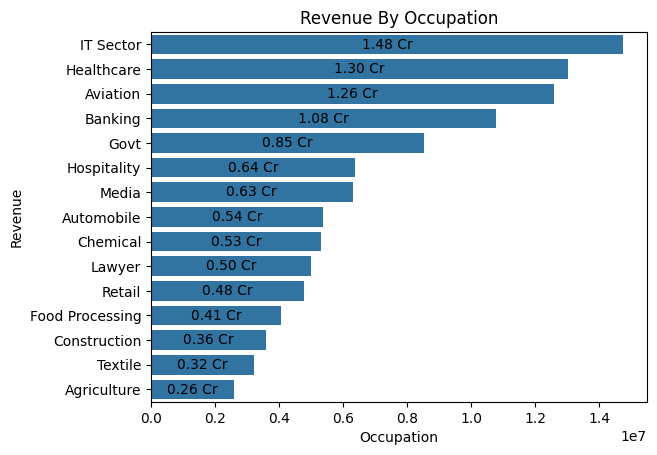

In [31]:
# lets plot this Occupation Vs Revenue

Occupation_Revenue = df.groupby(['Occupation'] , as_index = False )['Amount'].sum().sort_values(by = 'Amount' , ascending=False)

ax = sns.barplot(data = Occupation_Revenue , y = 'Occupation' , x = 'Amount')

# adding revenue
for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]  # Convert to crores format
    ax.bar_label(container , labels = labels ,label_type='center')

plt.title('Revenue By Occupation')
plt.xlabel('Occupation')
plt.ylabel('Revenue')

plt.show()

Among all professions, the IT sector contributes the highest revenue at ₹1.48 Cr, whereas the Agriculture sector records the lowest, with only ₹0.26 Cr.

In [33]:
df.columns

Index(['Cust_ID', 'Cust_Name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

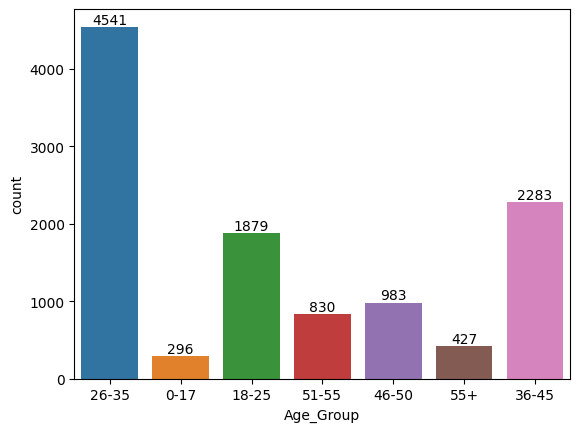

In [34]:
# Lets see which age groups are mostly involved

ax = sns.countplot(data = df , x = 'Age_Group' , hue = 'Age_Group')

for container in ax.containers:
    ax.bar_label(container , label_type='edge' )

    # u can see most of the people are in the age of 26 to 35 are doing more purchases

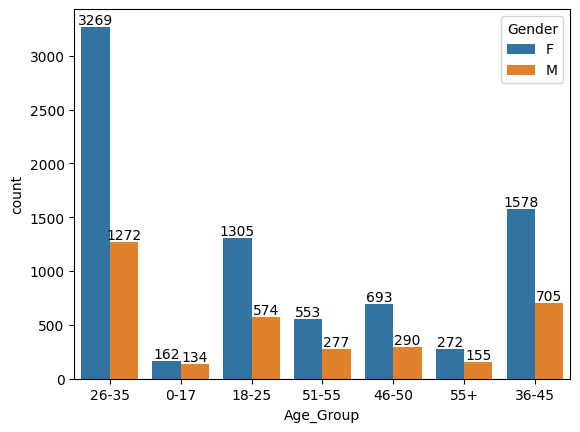

In [35]:
# Lets see which gender distribution in the Age groups

ax = sns.countplot(data = df , x = 'Age_Group' , hue = 'Gender')

for container in ax.containers:
    ax.bar_label(container , label_type='edge' )

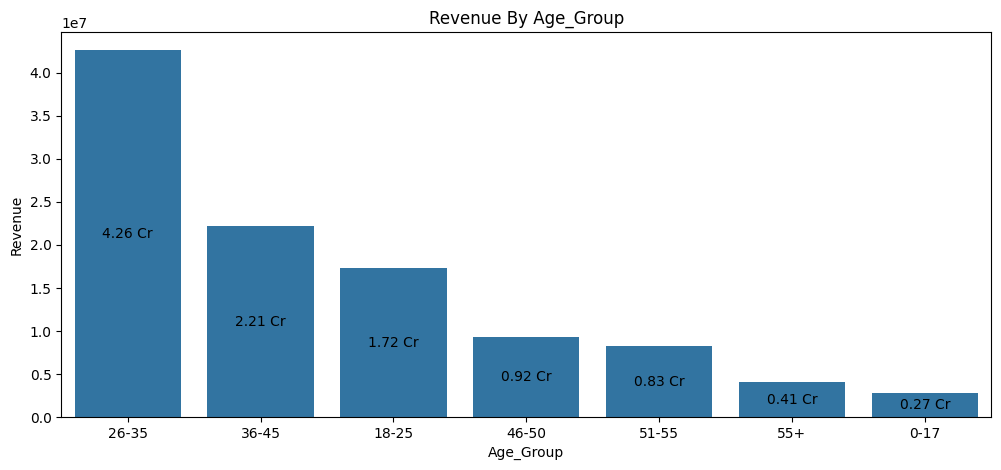

In [37]:
# lets plot this Occupation Vs Revenue

Age_Group = df.groupby(['Age_Group'] , as_index = False )['Amount'].sum().sort_values(by = 'Amount' , ascending=False)

plt.figure(figsize=(12, 5))

ax = sns.barplot(data = Age_Group , x = 'Age_Group' , y = 'Amount')

# adding revenue
for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]  # Convert to crores format
    ax.bar_label(container , labels = labels ,label_type='center' )

plt.title('Revenue By Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Revenue')

plt.show()



Customers aged 26 to 35 years contribute the most to overall revenue, with a total of ₹4.26 Cr, making them the most valuable age segment during the Diwali sales.

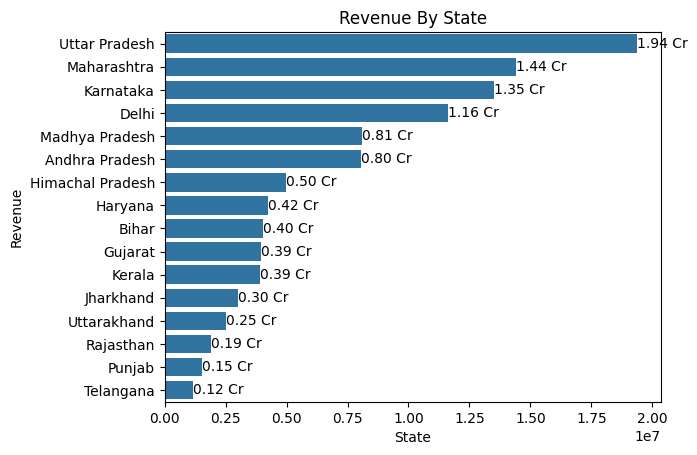

In [47]:
# Lets see which state are genrating high revenue

sales_state = df.groupby(['State'] , as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# plt.figure(figsize=(15, 5))

ax = sns.barplot(data = sales_state , y = 'State' , x = 'Amount')

for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]  # Convert to crores format
    ax.bar_label(container , labels = labels )

plt.title('Revenue By State')
plt.xlabel('State')
plt.ylabel('Revenue')

plt.show()

In [48]:
# Clearly we can see that Uttar Pradesh is generating highest revenue with 1.94 cr and Telangana as lowest with 0.12 Cr

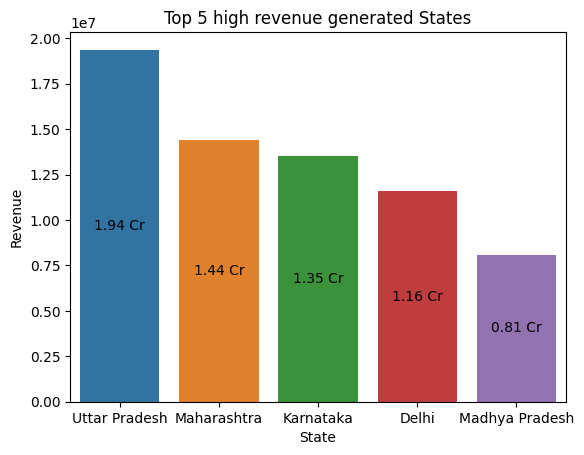

In [53]:
# Lets see which Top 5 states by revenue

sales_state = df.groupby(['State'] , as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

# plt.figure(figsize=(15, 5))

ax = sns.barplot(data = sales_state , x = 'State' , y = 'Amount' , hue='State')

for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]  # Convert to crores format
    ax.bar_label(container , labels = labels , label_type='center' )

plt.title('Top 5 high revenue generated States')
plt.xlabel('State')
plt.ylabel('Revenue')

plt.show()

Among all states, Uttar Pradesh generated the Highest revenue at ₹1.94 Cr.

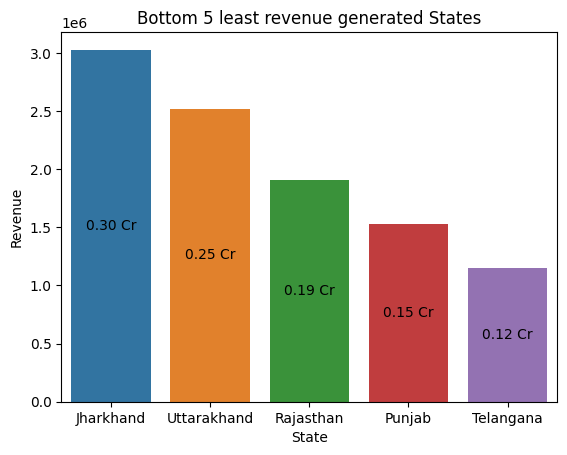

In [89]:
# Lets see which least 5 states by revenue

sales_state = df.groupby(['State'] , as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).tail(5)

# plt.figure(figsize=(15, 5))

ax = sns.barplot(data = sales_state , x = 'State' , y = 'Amount' , hue='State')

for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]  # Convert to crores format
    ax.bar_label(container , labels = labels , label_type='center' )

plt.title('Bottom 5 least revenue generated States')
plt.xlabel('State')
plt.ylabel('Revenue')

plt.show()

Among all Telangana generated the least revenue at ₹0.12 Cr.

In [68]:
# Here we can see that most of the customers are not married

df.groupby(['Marital_Status'] , as_index = False)['Marital_Status'].count()

,Marital_Status
0,6518
1,4721


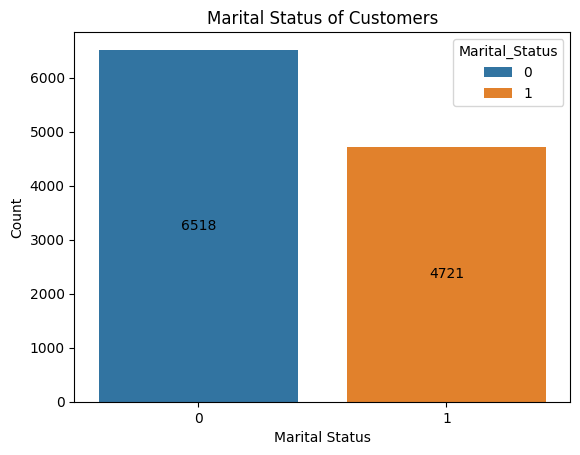

In [69]:
# Lets see marital status of the customers

ax = sns.countplot(data = df , x = 'Marital_Status' , hue = 'Marital_Status')

for container in ax.containers:
    ax.bar_label(container , label_type='center')

plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.show()

The analysis shows that the majority of customers are unmarried, with 6,518 customers compared to 4,721 who are married.

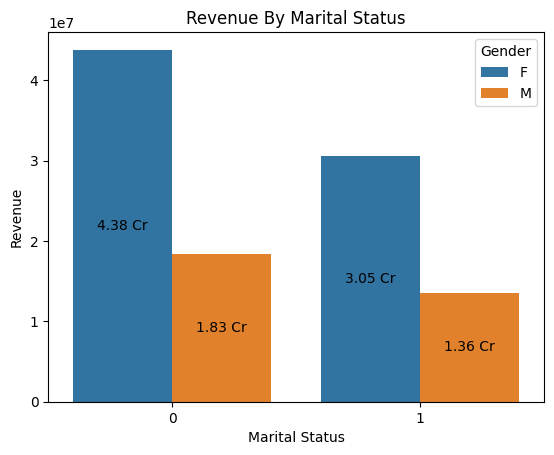

In [88]:
# Lets see revenue changes by the customers marital status and gender

marital_status = df.groupby(['Marital_Status' , 'Gender'] , as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# plt.figure(figsize=(15, 5))

ax = sns.barplot(data = marital_status , x = 'Marital_Status' , y = 'Amount' , hue='Gender')

for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]  # Convert to crores format
    ax.bar_label(container , labels = labels , label_type='center' )

plt.title('Revenue By Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Revenue')

plt.show()

The analysis reveals that, across both married and unmarried groups, women are significantly more active in making purchases compared to men.

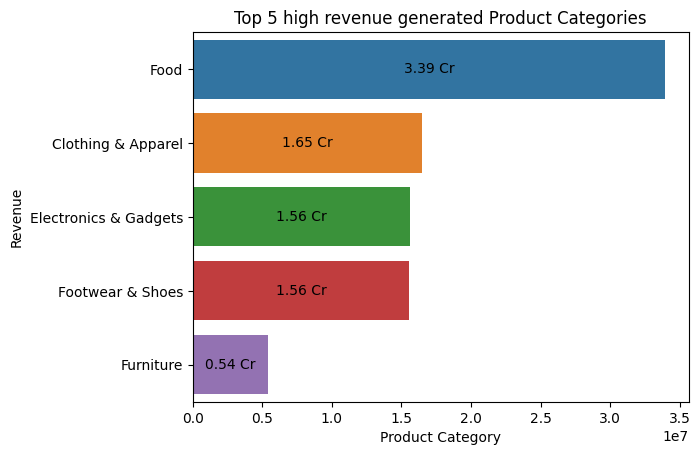

In [73]:
# Lets see which Product Category is generating high revenue

product_category = df.groupby(['Product_Category'] , as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

# plt.figure(figsize=(15, 5))

ax = sns.barplot(data = product_category , y = 'Product_Category' , x = 'Amount' , hue='Product_Category')

for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]
    ax.bar_label(container , labels = labels ,label_type='center' )

plt.title('Top 5 high revenue generated Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Revenue')

plt.show()

The Food category has generated the highest revenue, amounting to ₹3.39 Crores during the Diwali sales.
Other top-performing categories include Clothing, Electronics, Footwear, and Furniture.

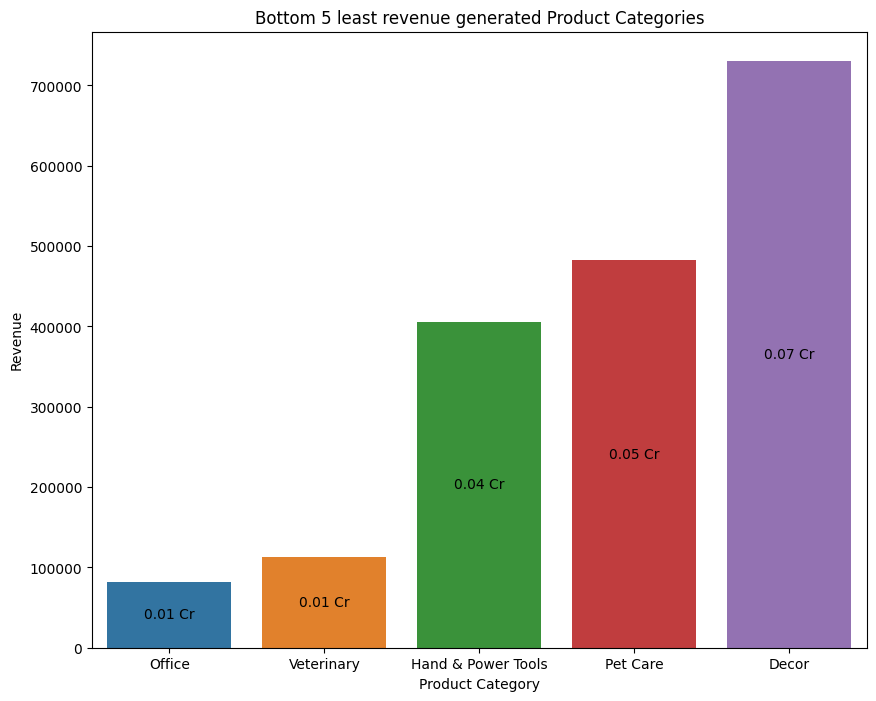

In [94]:
# Lets see which Product Category is generating Least revenue

product_category = df.groupby(['Product_Category'] , as_index=False)['Amount'].sum().sort_values(by='Amount' ).head(5)

plt.figure(figsize=(10, 8))

ax = sns.barplot(data = product_category , x = 'Product_Category' , y = 'Amount' , hue='Product_Category')

for container in ax.containers:
    labels = [f'{x/10000000:.2f} Cr' for x in container.datavalues]
    ax.bar_label(container , labels = labels ,label_type='center' )

plt.title('Bottom 5 least revenue generated Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Revenue')

plt.show()

The analysis shows that Office Supplies and Veterinary Products were among the least purchased categories during the Diwali sales.

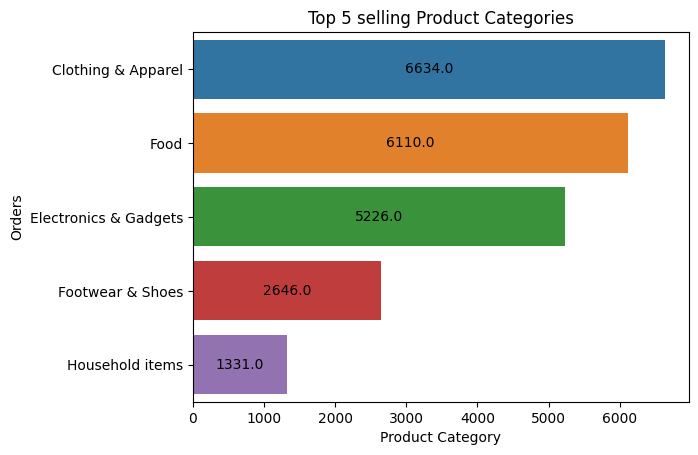

In [85]:
# Lets see top selling Products

product_category = df.groupby(['Product_Category'] , as_index=False)['Orders'].sum().sort_values(by ='Orders' , ascending=False).head(5)



ax = sns.barplot(data = product_category , y = 'Product_Category' , x = 'Orders' , hue='Product_Category')

for container in ax.containers:
    labels = container.datavalues
    ax.bar_label(container , labels = labels ,label_type='center' )

plt.title('Top 5 selling Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Orders')

plt.show()

The data indicates that the Clothing & Apparel, Food, and Electronic Gadgets categories are the top-performing in terms of order volume.

# **Conclusion**

Based on the analysis, the majority of buyers are unmarried people aged 26–35, primarily from Uttar Pradesh, Maharashtra, and Karnataka. They are mostly employed in the IT, Healthcare, and Aviation sectors, and tend to purchase products from the Food, Clothing, and Electronics categories.